In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
# 对实验4的数据集进行预处理
df = pd.read_csv('4_data.csv')

df = df.dropna()

df = df.drop('id', axis=1)

replace_values1 = {'14-Oct': '10-14', '9-May': '5-9'}
df['tumor-size'] = df['tumor-size'].replace(replace_values1)

replace_values2 = {'5-Mar': '3-5', '8-Jun': '6-8', '11-Sep': '9-11', '14-Dec': '12-14'}
df['inv-nodes'] = df['inv-nodes'].replace(replace_values2)

X = df.drop('Class', axis=1)
le = LabelEncoder()
# 使用LabelEncoder
for col in X.columns:
    if df[col].dtype == 'object':
        X[col] = le.fit_transform(df[col])
        
y = le.fit_transform(df['Class'])

In [12]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score = cross_val_score(rfc,X,y,cv=10).mean()
score

0.6858465608465607

In [29]:
X_reduce = X[['node-caps', 'irradiat', 'inv-nodes']]

rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score = cross_val_score(rfc,X_reduce,y,cv=10).mean()
score

0.6665343915343915

0.6928571428571428 81


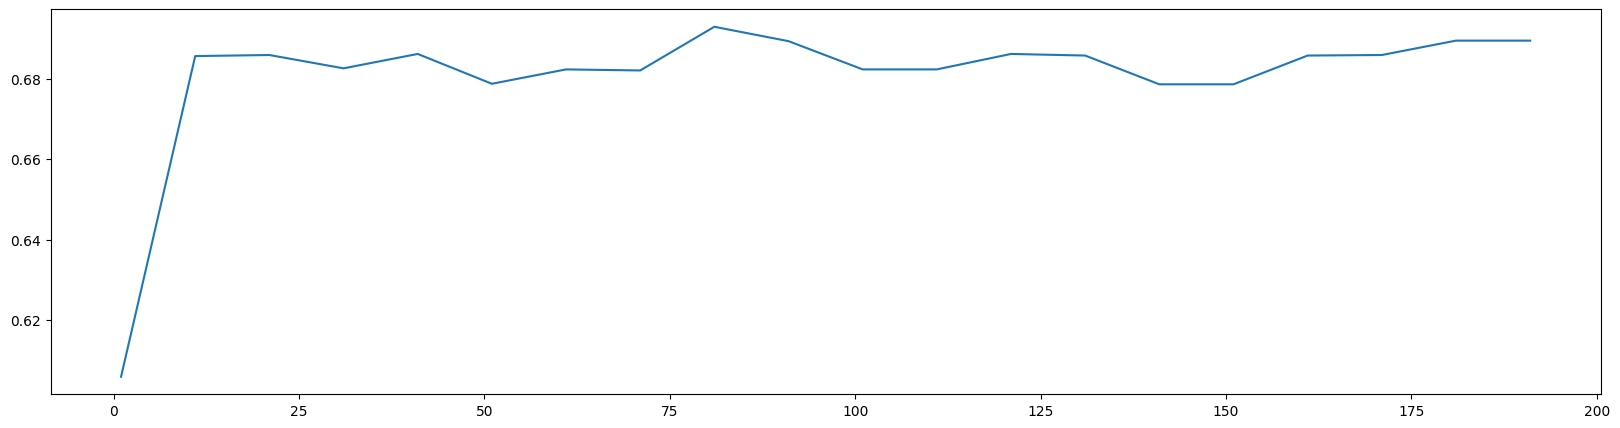

In [11]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,X,y,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.6929894179894179 76


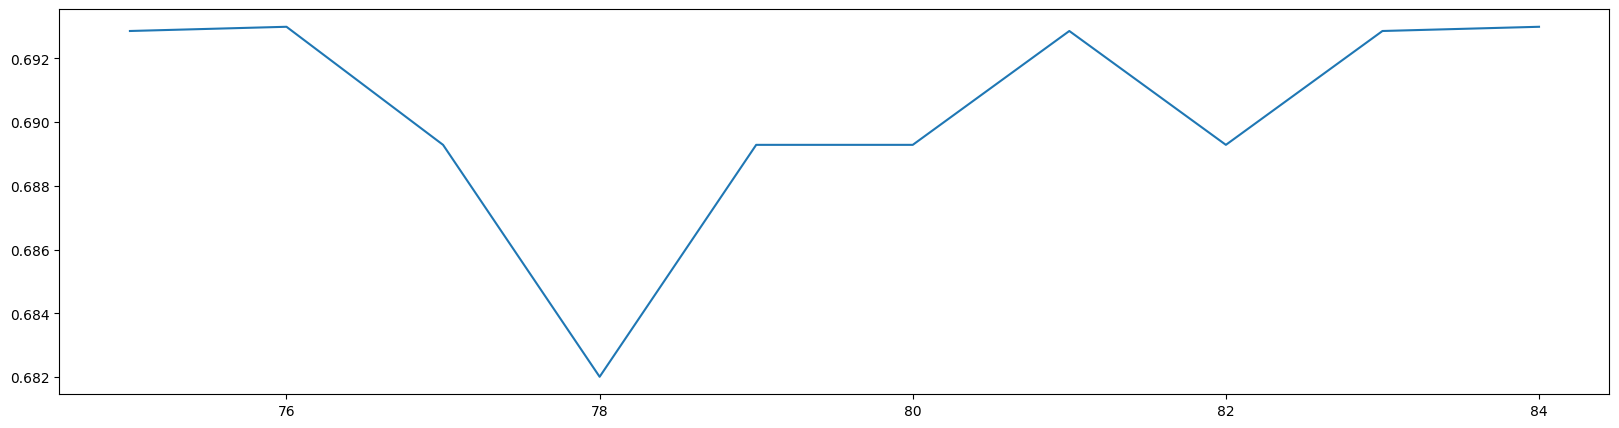

In [13]:
scorel = []
for i in range(75,85):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,X,y,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(75,85)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(75,85),scorel)
plt.show()

In [14]:
#调整max_depth

param_grid = {'max_depth':np.arange(1, 50, 1)}

rfc = RandomForestClassifier(n_estimators=46,random_state=90)

GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(X,y)

GS.best_params_, GS.best_score_

({'max_depth': 2}, 0.7653439153439153)

In [15]:
#调整max_features
param_grid = {'max_features':np.arange(5,30,1)} 

rfc = RandomForestClassifier(n_estimators=39,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(X,y)

GS.best_params_,GS.best_score_

({'max_features': 5}, 0.6821428571428572)

In [20]:
param_grid = {'min_samples_split':np.arange(2, 30, 1)}

rfc = RandomForestClassifier(n_estimators=39,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(X,y)

print(GS.best_params_, GS.best_score_)

{'min_samples_split': 26} 0.7506613756613757


In [21]:
param_grid = {'min_samples_leaf':np.arange(1, 30, 1)}

rfc = RandomForestClassifier(n_estimators=39,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(X,y)

print(GS.best_params_, GS.best_score_)

{'min_samples_leaf': 18} 0.7690476190476191


In [22]:
param_grid = {
    'n_estimators': range(75, 80),
    'max_depth': np.arange(1, 5, 1),
    'max_features': np.arange(3, 7, 1),
    'min_samples_split': np.arange(25, 30, 1),
    'min_samples_leaf': np.arange(15, 20, 1)
}

rfc = RandomForestClassifier(random_state=90)
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(X, y)
print(GS.best_params_, GS.best_score_)

{'max_depth': 2, 'max_features': 5, 'min_samples_leaf': 16, 'min_samples_split': 25, 'n_estimators': 79} 0.7687830687830688


In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10),
    'max_features': ['sqrt', 'log2']
}

dtc = DecisionTreeClassifier(random_state=90)
GS = GridSearchCV(dtc, param_grid, cv=10)
GS.fit(X, y)
print(GS.best_params_, GS.best_score_)

{'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2} 0.7794973544973545


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 将X和y转换为DataFrame
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y, columns=['Class'])

# 将y和X合并为一个新的DataFrame
df_new = pd.concat([y_df, X_df], axis=1)
#print(df_new)
# 计算Pearson相关系数矩阵
correlation_matrix = df_new.corr()
print(correlation_matrix.iloc[0])

Class          1.000000
age           -0.077141
menopause      0.089333
tumor-size     0.103101
inv-nodes      0.289761
node-caps      0.272319
deg-malig      0.287051
breast        -0.022286
breast-quad    0.032780
irradiat       0.226988
Name: Class, dtype: float64


In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# 创建神经网络分类器
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=3000)

# 使用k折交叉验证评估模型
scores = cross_val_score(mlp, X, y, cv=10)

# 打印模型的平均得分
print('Average score:', scores.mean())

Average score: 0.6820105820105821


In [24]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

#rf = RandomForestClassifier(max_depth=2, max_features=5, min_samples_leaf=16, min_samples_split=25, n_estimators=79)
svm = SVC()
dt = DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=8, min_samples_split=2)
#dt = DecisionTreeClassifier()
rf = RandomForestClassifier(max_depth=2, max_features=5, min_samples_leaf=16, min_samples_split=25, n_estimators=79)
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=3000)
    
# 创建集成学习模型
eclf = VotingClassifier(estimators=[('rf', rf), ('svm', svm), ('dt', dt), ('mlp', mlp)], voting='hard')

cv = KFold(n_splits=10, shuffle=True, random_state=1)

scores = cross_val_score(eclf, X, y, cv=cv)

# 打印模型的平均得分
print('Average score:', scores.mean())

Average score: 0.7432539682539683


In [7]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

# 首先，对数据进行标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 初始化最高得分和最佳主成分数量
best_score_pca = 0
best_n_components_pca = 0

# 使用PCA进行降维，并找到得分最高的主成分数量
for n_components in range(1, X_scaled.shape[1] + 1):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    rfc = RandomForestClassifier(n_estimators=100, random_state=90)
    score = cross_val_score(rfc, X_pca, y, cv=10).mean()
    if score > best_score_pca:
        best_score_pca = score
        best_n_components_pca = n_components

print("Best score with PCA: ", best_score_pca)
print("Best number of components with PCA: ", best_n_components_pca)

# 初始化最高得分和最佳主成分数量
best_score_kpca = 0
best_n_components_kpca = 0

# 使用Kernel PCA进行降维，并找到得分最高的主成分数量
for n_components in range(1, X_scaled.shape[1] + 1):
    kpca = KernelPCA(n_components=n_components, kernel='rbf')
    X_kpca = kpca.fit_transform(X_scaled)
    rfc = RandomForestClassifier(n_estimators=100, random_state=90)
    score = cross_val_score(rfc, X_kpca, y, cv=10).mean()
    if score > best_score_kpca:
        best_score_kpca = score
        best_n_components_kpca = n_components

print("Best score with Kernel PCA: ", best_score_kpca)
print("Best number of components with Kernel PCA: ", best_n_components_kpca)

Best score with PCA:  0.7220899470899471
Best number of components with PCA:  8
Best score with Kernel PCA:  0.7039682539682539
Best number of components with Kernel PCA:  6


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    # Train on the training set
    clf.fit(X_train, y_train)
    
    # Validate on the validation set
    y_val_pred = clf.predict(X_val)
    print(f"Classification Report for {name} on Validation Set:")
    print(classification_report(y_val, y_val_pred))
    
    # Test on the test set
    y_test_pred = clf.predict(X_test)
    print(f"Classification Report for {name} on Test Set:")
    print(classification_report(y_test, y_test_pred))

Classification Report for Logistic Regression on Validation Set:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        20
           1       1.00      0.12      0.22         8

    accuracy                           0.75        28
   macro avg       0.87      0.56      0.54        28
weighted avg       0.81      0.75      0.67        28

Classification Report for Logistic Regression on Test Set:
              precision    recall  f1-score   support

           0       0.70      0.92      0.80        36
           1       0.67      0.30      0.41        20

    accuracy                           0.70        56
   macro avg       0.68      0.61      0.60        56
weighted avg       0.69      0.70      0.66        56

Classification Report for Random Forest on Validation Set:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.50      0.38      0.43         8
